#Importing The dataset

In [87]:
import pandas as pd
#importing the dataset using pandas
df = pd.read_csv('/content/COMP1801_Coursework_Dataset.csv')
print(df.head())


   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       Bottom         Die  
1           

In [88]:
df.size

16000

In [89]:
print(df.isnull())

     Lifespan  partType  microstructure  coolingRate  quenchTime  forgeTime  \
0       False     False           False        False       False      False   
1       False     False           False        False       False      False   
2       False     False           False        False       False      False   
3       False     False           False        False       False      False   
4       False     False           False        False       False      False   
..        ...       ...             ...          ...         ...        ...   
995     False     False           False        False       False      False   
996     False     False           False        False       False      False   
997     False     False           False        False       False      False   
998     False     False           False        False       False      False   
999     False     False           False        False       False      False   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromi

In [90]:
print(df.isnull().sum())

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
HeatTreatTime     0
Nickel%           0
Iron%             0
Cobalt%           0
Chromium%         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64


In [91]:
print(df.dtypes)

Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
HeatTreatTime     float64
Nickel%           float64
Iron%             float64
Cobalt%           float64
Chromium%         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object


##EDA

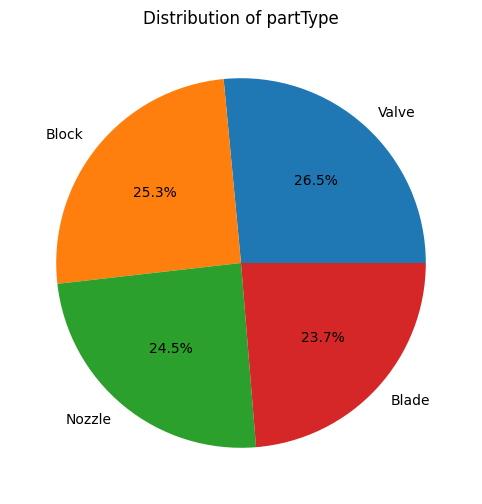

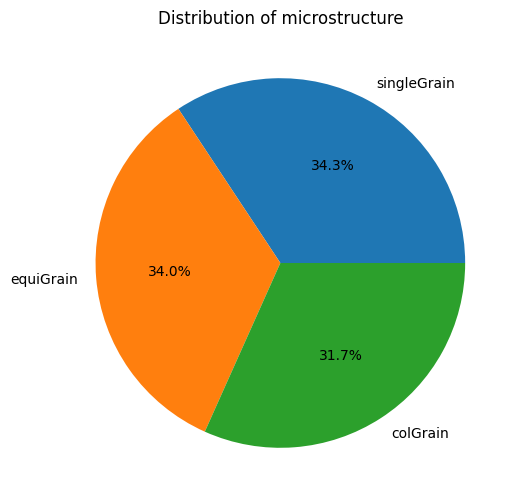

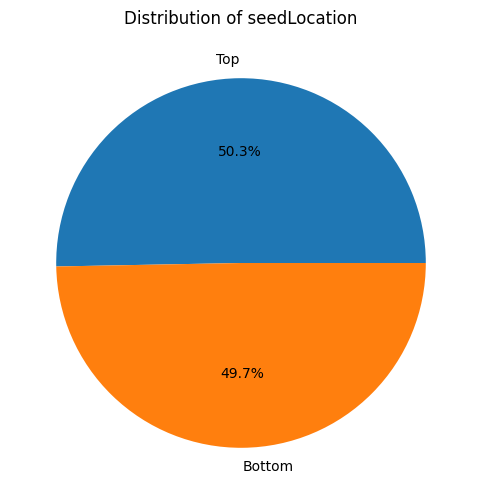

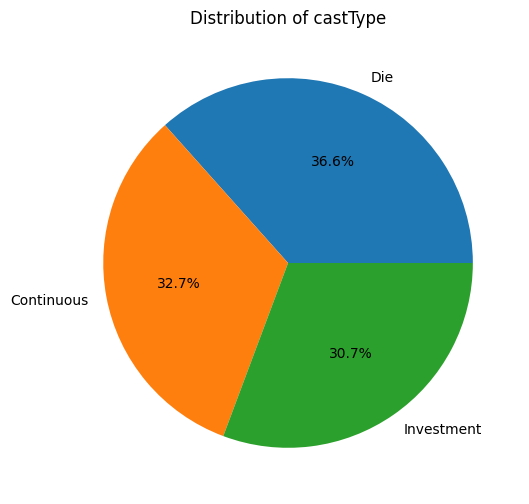

In [92]:
import matplotlib.pyplot as plt
pieCols = df.select_dtypes(include=['object']).columns
for col in pieCols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

## Preprocessing

In [93]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
for col in pieCols:
    df[col] = lEncoder.fit_transform(df[col])
df.dtypes

,0
Lifespan,float64
partType,int64
microstructure,int64
coolingRate,int64
quenchTime,float64
forgeTime,float64
HeatTreatTime,float64
Nickel%,float64
Iron%,float64
Cobalt%,float64


In [94]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(exclude=['object']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

   Lifespan  partType  microstructure  coolingRate  quenchTime  forgeTime  \
0  0.612383  0.666667             0.5         0.32    0.743875   0.606466   
1  0.801409  0.333333             1.0         0.56    0.472160   0.273133   
2  0.164639  0.000000             0.5         0.92    0.057906   0.034560   
3  0.386889  0.666667             0.0         0.16    0.336303   0.129320   
4  0.827735  0.000000             0.0         0.44    0.808463   0.316611   

   HeatTreatTime   Nickel%     Iron%   Cobalt%  Chromium%  smallDefects  \
0       0.778533  0.788259  0.266559  0.788243   0.093750      0.163934   
1       0.741678  0.210738  0.776426  0.074816   0.837054      0.311475   
2       0.144531  0.090818  0.791836  0.253173   0.647321      0.573770   
3       0.327106  0.351731  0.450662  0.790915   0.506696      0.000000   
4       0.256454  0.481686  0.559881  0.429526   0.234375      0.163934   

   largeDefects  sliverDefects  seedLocation  castType  
0          0.00            0.

In [95]:
from sklearn.model_selection import train_test_split
y = df['Lifespan']
X = df.drop('Lifespan', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 15)
(200, 15)
(800,)
(200,)


## Regression

### Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = sqrt(mse_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

Linear Regression - Mean Squared Error: 0.031225551626761012
Linear Regression - Root Mean Squared Error: 0.1767075313243921
Linear Regression - R-squared: 0.11155422970176754


In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Lowest MSE:", -grid_search.best_score_)

Best hyperparameters: {'fit_intercept': True, 'positive': False}
Lowest MSE: 0.03393659324239735


In [99]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_fit_intercept', 'param_positive', 'mean_test_score']]
results = results.rename(columns={'mean_test_score': 'MSE', 'param_fit_intercept': 'fit_intercept', 'param_positive': 'positive'})
results['MSE'] = -results['MSE']
print(results)

   fit_intercept  positive       MSE
0           True      True  0.034872
1           True     False  0.033937
2          False      True  0.034872
3          False     False  0.034009


In [100]:
best_lr_model = grid_search.best_estimator_

In [101]:
y_pred_best_lr = best_lr_model.predict(X_test)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)
r2_best_lr = r2_score(y_test, y_pred_best_lr)
rmse_best_lr = sqrt(mse_best_lr)
print(f"Best Linear Regression - Mean Squared Error: {mse_best_lr}")
print(f"Best Linear Regression - Root Mean Squared Error: {rmse_best_lr}")
print(f"Best Linear Regression - R-squared: {r2_best_lr}")


Best Linear Regression - Mean Squared Error: 0.031225551626761012
Best Linear Regression - Root Mean Squared Error: 0.1767075313243921
Best Linear Regression - R-squared: 0.11155422970176754


###Support Vector Regression

In [102]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)

print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - Root Mean Squared Error: {rmse_svr}")
print(f"Support Vector Regression - R-squared: {r2_svr}")

Support Vector Regression - Mean Squared Error: 0.010757274715291462
Support Vector Regression - Root Mean Squared Error: 0.1037172826258549
Support Vector Regression - R-squared: 0.6939283784326796


In [103]:
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train, y_train)

print("Best hyperparameters for SVR:", grid_search_svr.best_params_)
print("Lowest MSE for SVR:", -grid_search_svr.best_score_)


Best hyperparameters for SVR: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Lowest MSE for SVR: 0.01126066741027892


In [104]:
results_svr = pd.DataFrame(grid_search_svr.cv_results_)
results_svr = results_svr[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]
results_svr = results_svr.rename(columns={'mean_test_score': 'MSE', 'param_kernel': 'kernel', 'param_C': 'C', 'param_gamma': 'gamma'})
results_svr['MSE'] = -results_svr['MSE']
print(results_svr)

    kernel     C  gamma       MSE
0   linear   0.1  scale  0.034583
1      rbf   0.1  scale  0.019836
2     poly   0.1  scale  0.012976
3   linear   0.1   auto  0.034583
4      rbf   0.1   auto  0.032552
5     poly   0.1   auto  0.038268
6   linear   1.0  scale  0.034498
7      rbf   1.0  scale  0.012682
8     poly   1.0  scale  0.011262
9   linear   1.0   auto  0.034498
10     rbf   1.0   auto  0.022347
11    poly   1.0   auto  0.033248
12  linear  10.0  scale  0.034466
13     rbf  10.0  scale  0.012471
14    poly  10.0  scale  0.011438
15  linear  10.0   auto  0.034466
16     rbf  10.0   auto  0.011261
17    poly  10.0   auto  0.021703


In [105]:
best_svr_model = grid_search_svr.best_estimator_
y_pred_best_svr = best_svr_model.predict(X_test)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)
rmse_best_svr = sqrt(mse_best_svr)

print(f"Best Support Vector Regression - Mean Squared Error: {mse_best_svr}")
print(f"Best Support Vector Regression - Root Mean Squared Error: {rmse_best_svr}")
print(f"Best Support Vector Regression - R-squared: {r2_best_svr}")

Best Support Vector Regression - Mean Squared Error: 0.009347941613236772
Best Support Vector Regression - Root Mean Squared Error: 0.09668475377864275
Best Support Vector Regression - R-squared: 0.7340274629397627


In [106]:
metrics = {
    'Model': ['Linear Regression', 'Best Linear Regression', 'Support Vector Regression', 'Best Support Vector Regression'],
    'MSE': [mse_lr, mse_best_lr, mse_svr, mse_best_svr],
    'RMSE': [rmse_lr, rmse_best_lr, rmse_svr, rmse_best_svr],
    'R-squared': [r2_lr, r2_best_lr, r2_svr, r2_best_svr]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MSE,RMSE,R-squared
0,Linear Regression,0.031226,0.176708,0.111554
1,Best Linear Regression,0.031226,0.176708,0.111554
2,Support Vector Regression,0.010757,0.103717,0.693928
3,Best Support Vector Regression,0.009348,0.096685,0.734027


## Classification

In [107]:
df = pd.read_csv('/content/COMP1801_Coursework_Dataset.csv')
print(df.head())

   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       Bottom         Die  
1           

In [108]:
df['1500_labels'] = df['Lifespan'].apply(lambda x: 0 if x <= 1500 else 1)

In [109]:
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType,1500_labels
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die,0
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment,1
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment,0
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous,0
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die,1


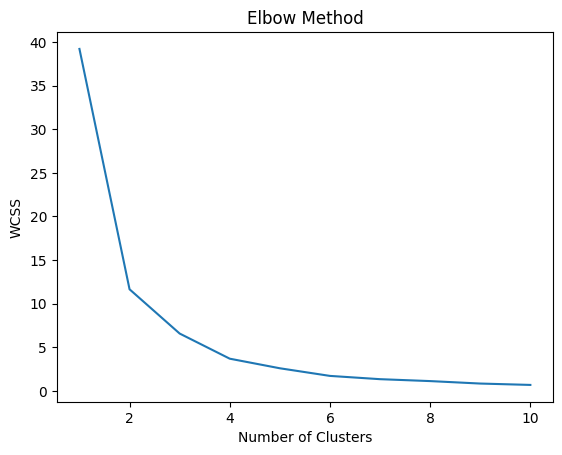

   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0  0.612383   Nozzle      equiGrain         0.32    0.743875   0.606466   
1  0.801409    Block    singleGrain         0.56    0.472160   0.273133   
2  0.164639    Blade      equiGrain         0.92    0.057906   0.034560   
3  0.386889   Nozzle       colGrain         0.16    0.336303   0.129320   
4  0.827735    Blade       colGrain         0.44    0.808463   0.316611   

   HeatTreatTime   Nickel%     Iron%   Cobalt%  Chromium%  smallDefects  \
0       0.778533  0.788259  0.266559  0.788243   0.093750      0.163934   
1       0.741678  0.210738  0.776426  0.074816   0.837054      0.311475   
2       0.144531  0.090818  0.791836  0.253173   0.647321      0.573770   
3       0.327106  0.351731  0.450662  0.790915   0.506696      0.000000   
4       0.256454  0.481686  0.559881  0.429526   0.234375      0.163934   

   largeDefects  sliverDefects seedLocation    castType  1500_labels  cluster  
0          0.00   

In [110]:
from sklearn.cluster import KMeans
numerical_cols = df.select_dtypes(exclude=['object']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Lifespan']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Lifespan']])
print(df.head())

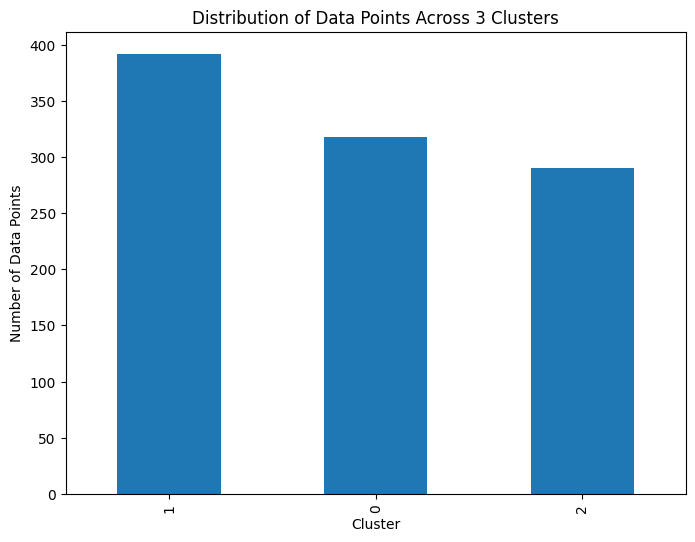

,min,max,mean,median,count
cluster,,,,,
0,0.620865,1.000000,0.744627,0.727495,318
1,0.388712,0.618943,0.495906,0.487335,392
2,0.000000,0.388584,0.282077,0.302154,290


In [111]:
plt.figure(figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar')
plt.title(f'Distribution of Data Points Across {optimal_k} Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()
cluster_stats = df.groupby('cluster')['Lifespan'].agg(['min', 'max', 'mean', 'median', 'count'])
cluster_stats


In [112]:
df = df.drop(['1500_labels', 'Lifespan'], axis=1)

In [113]:
df.head()

,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType,cluster
0,Nozzle,equiGrain,0.32,0.743875,0.606466,0.778533,0.788259,0.266559,0.788243,0.093750,0.163934,0.00,0.0,Bottom,Die,1
1,Block,singleGrain,0.56,0.472160,0.273133,0.741678,0.210738,0.776426,0.074816,0.837054,0.311475,0.00,0.0,Bottom,Investment,0
2,Blade,equiGrain,0.92,0.057906,0.034560,0.144531,0.090818,0.791836,0.253173,0.647321,0.573770,0.75,0.0,Bottom,Investment,2
3,Nozzle,colGrain,0.16,0.336303,0.129320,0.327106,0.351731,0.450662,0.790915,0.506696,0.000000,0.25,0.0,Top,Continuous,2
4,Blade,colGrain,0.44,0.808463,0.316611,0.256454,0.481686,0.559881,0.429526,0.234375,0.163934,0.00,0.0,Top,Die,0


In [114]:
pieCols = df.select_dtypes(include=['object']).columns

In [115]:
lEncoder = LabelEncoder()
for col in pieCols:
    df[col] = lEncoder.fit_transform(df[col])
df.dtypes

,0
partType,int64
microstructure,int64
coolingRate,float64
quenchTime,float64
forgeTime,float64
HeatTreatTime,float64
Nickel%,float64
Iron%,float64
Cobalt%,float64
Chromium%,float64


In [116]:
from sklearn.model_selection import train_test_split
y = df['cluster']
X = df.drop('cluster', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nAccuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Metrics:
Confusion Matrix:
 [[25 25  6]
 [29 34 26]
 [ 9 22 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.45      0.42        56
           1       0.42      0.38      0.40        89
           2       0.43      0.44      0.43        55

    accuracy                           0.41       200
   macro avg       0.42      0.42      0.42       200
weighted avg       0.42      0.41      0.41       200


Accuracy: 0.415


In [118]:
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_logreg = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

print("Best hyperparameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logreg.best_score_)

results_logreg = pd.DataFrame(grid_search_logreg.cv_results_)
results_logreg = results_logreg[['param_C', 'param_penalty', 'param_solver', 'mean_test_score']]
results_logreg = results_logreg.rename(columns={'mean_test_score': 'Accuracy', 'param_C': 'C', 'param_penalty': 'penalty', 'param_solver': 'solver'})
results_logreg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.41


,C,penalty,solver,Accuracy
0,0.001,l1,liblinear,0.32750
1,0.001,l1,saga,0.35875
2,0.001,l2,liblinear,0.37875
3,0.001,l2,saga,0.37875
4,0.010,l1,liblinear,0.34125
5,0.010,l1,saga,0.37875
6,0.010,l2,liblinear,0.38500
7,0.010,l2,saga,0.38375
8,0.100,l1,liblinear,0.39000
9,0.100,l1,saga,0.38500


In [119]:
best_logreg_model = grid_search_logreg.best_estimator_
y_pred_best_logreg = best_logreg_model.predict(X_test)

print("Best Logistic Regression Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_logreg))
print("\nAccuracy:", accuracy_score(y_test, y_pred_best_logreg))

Best Logistic Regression Metrics:
Confusion Matrix:
 [[24 25  7]
 [29 33 27]
 [10 22 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.43      0.40        56
           1       0.41      0.37      0.39        89
           2       0.40      0.42      0.41        55

    accuracy                           0.40       200
   macro avg       0.40      0.41      0.40       200
weighted avg       0.40      0.40      0.40       200


Accuracy: 0.4



## XGBoost

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Metrics:
Confusion Matrix:
 [[53  3  0]
 [ 6 74  9]
 [ 0  6 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.89      0.83      0.86        89
           2       0.84      0.89      0.87        55

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.88      0.88      0.88       200


Accuracy: 0.88


In [121]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, scoring='accuracy', cv=5)
grid_search_xgb.fit(X_train, y_train)

print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)
print("Best accuracy for XGBoost:", grid_search_xgb.best_score_)

results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
results_xgb = results_xgb[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score']]
results_xgb = results_xgb.rename(columns={'mean_test_score': 'Accuracy', 'param_n_estimators': 'n_estimators', 'param_learning_rate': 'learning_rate', 'param_max_depth': 'max_depth'})
results_xgb

Best hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best accuracy for XGBoost: 0.85375


,n_estimators,learning_rate,max_depth,Accuracy
0,50,0.01,3,0.68875
1,100,0.01,3,0.70625
2,200,0.01,3,0.72500
3,50,0.01,5,0.77250
4,100,0.01,5,0.77875
5,200,0.01,5,0.79125
6,50,0.01,7,0.79250
7,100,0.01,7,0.78750
8,200,0.01,7,0.79750
9,50,0.10,3,0.80000


In [122]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

print("Best XGBoost Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("\nAccuracy:", accuracy_score(y_test, y_pred_best_xgb))

Best XGBoost Metrics:
Confusion Matrix:
 [[52  4  0]
 [ 7 76  6]
 [ 0  7 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.87      0.85      0.86        89
           2       0.89      0.87      0.88        55

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.88      0.88      0.88       200


Accuracy: 0.88


In [124]:
accuracy_scores = {
    'Model': ['Logistic Regression', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_best_logreg) * 100, accuracy_score(y_test, y_pred_best_xgb)*100]
}

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df

,Model,Accuracy
0,Logistic Regression,40.0
1,XGBoost,88.0
